<a href="https://colab.research.google.com/github/yahiamabrouk1981/ForestFireForecast/blob/Main/ForestFireForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 4

In [1]:
import numpy
import pandas

In [2]:
pandas.set_option('display.max_rows',500)
pandas.set_option('display.max_columns',500)
pandas.set_option('display.width',1000)

##Description statistics


In [3]:
filename='forestfires.csv'
names=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
df= pandas.read_csv(filename,names=names)

In [4]:
print(df.shape)

(517, 13)


In [5]:
print(df.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [6]:
print(df.describe())

                X           Y        FFMC         DMC          DC         ISI        temp          RH        wind        rain         area
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   517.000000
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   18.889168   44.288201    4.017602    0.021663    12.847292
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477    5.806625   16.317469    1.791653    0.295959    63.655818
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000    2.200000   15.000000    0.400000    0.000000     0.000000
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   15.500000   33.000000    2.700000    0.000000     0.000000
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   19.300000   42.000000    4.000000    0.000000     0.520000
75%      7.000000    5.0000

In [ ]:
print(df.corr(method='pearson'))

             X         Y      FFMC       DMC        DC       ISI      temp        RH      wind      rain      area
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258  0.085223  0.018798  0.065387  0.063385
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103  0.062221 -0.020341  0.033234  0.044873
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485  0.056702  0.040122
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342  0.074790  0.072994
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466  0.035861  0.049383
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826  0.067668  0.008258
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116  0.069491  0.097844
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.00

<ipython-input-25-52dee18fca7d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method='pearson'))


In [7]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [8]:
print(df.head())

   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [16]:
from matplotlib import pyplot as plt

###Scatter Matrix

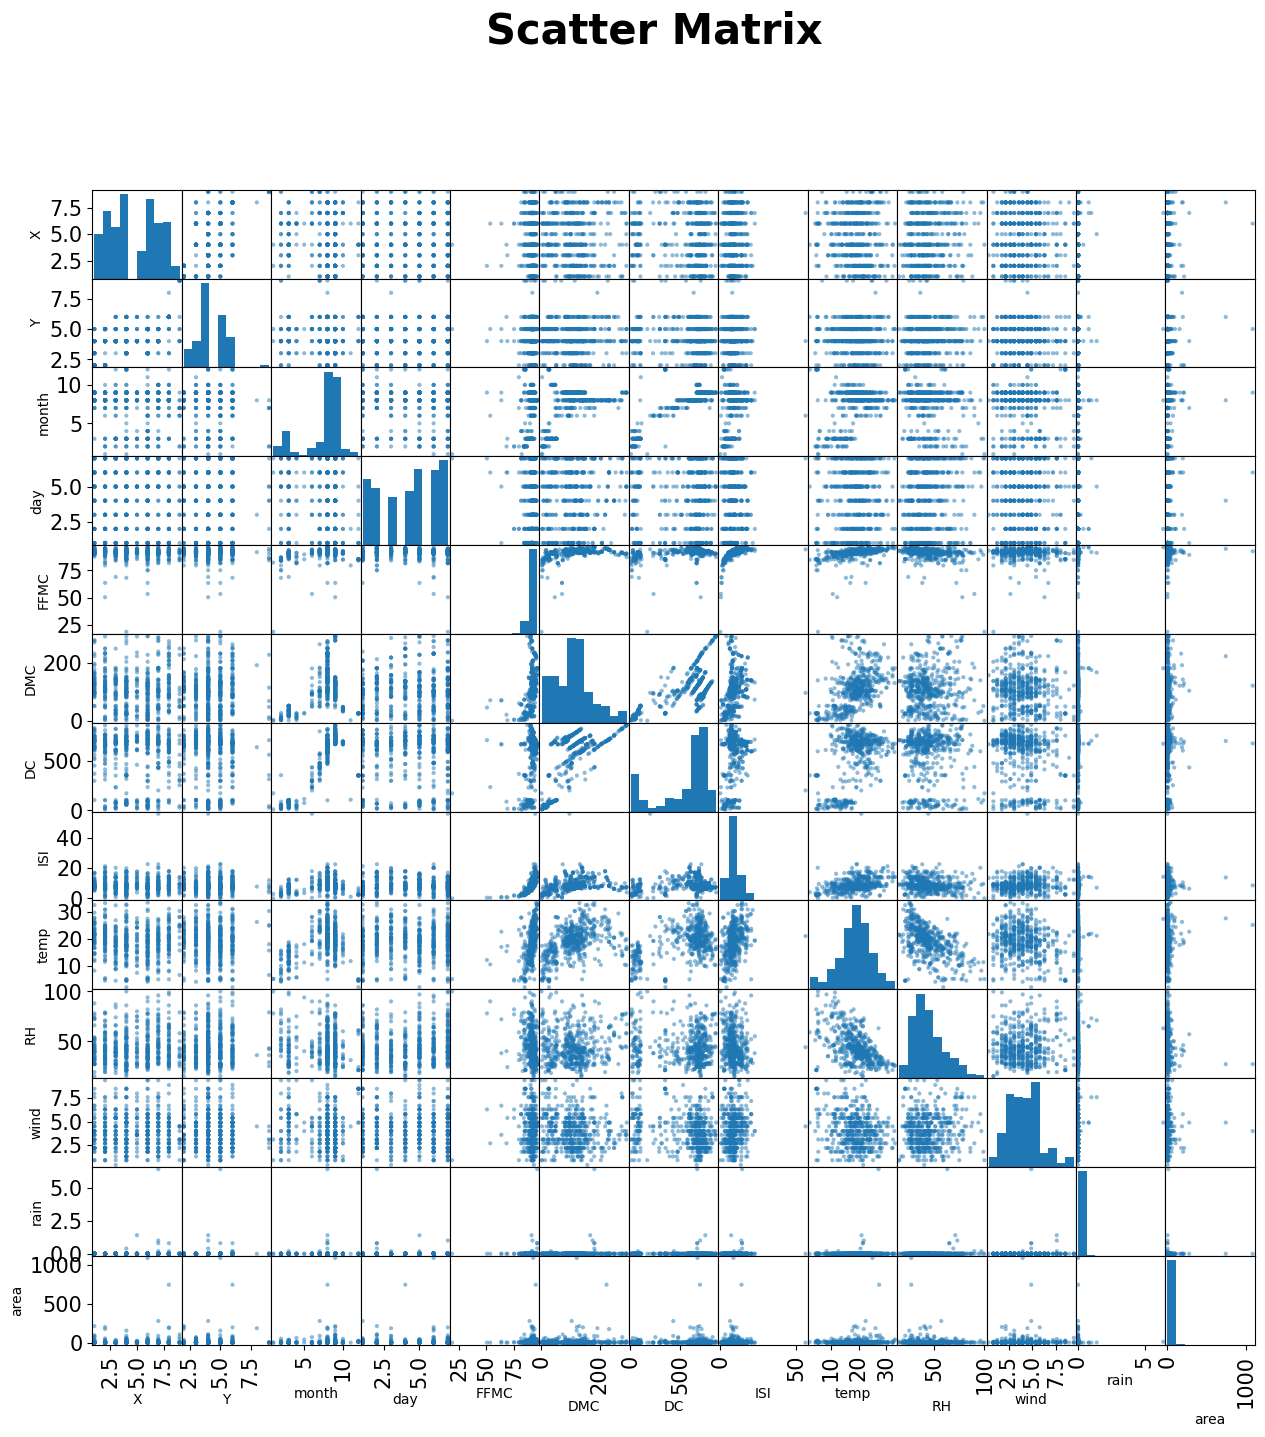

In [17]:
from pandas.plotting._matplotlib import scatter_matrix
Axes=scatter_matrix(df,figsize=(15,15))
plt.suptitle("Scatter Matrix",y=1.00,fontweight='bold',fontsize=30)
plt.rcParams['axes.labelsize'] = 15
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
plt.show()

###Heatmap Matrix

In [14]:
import seaborn as sns
plt.figure(figsize = (11,11))
plt.style.use('default')
sns.heatmap(df.corr(), annot = True)

NameError: ignored

###Train Test

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

In [10]:
X, y = np.arange(10).reshape((5, 2)), range(5)

In [18]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [19]:
list(y)

[0, 1, 2, 3, 4]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print("X_train")
print(X_train)
print("X_test")
print(X_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)

X_train
[[4 5]
 [0 1]
 [6 7]]
X_test
[[2 3]
 [8 9]]
y_train
[2, 0, 3]
y_test
[1, 4]


###KFold


In [20]:
dataset=range(16)

In [31]:
KFCrossValidator = KFold(n_splits=4,shuffle = True)
KFdataset = KFCrossValidator.split(dataset)

In [22]:
print('{} {:^61} {}'.format('Round', 'Training set', 'Testing set'))
for iteration, data in enumerate(KFdataset, start=1):
      print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Round                         Training set                          Testing set
    1     [ 4  5  6  7  8  9 10 11 12 13 14 15]         [0 1 2 3]        
    2     [ 0  1  2  3  8  9 10 11 12 13 14 15]         [4 5 6 7]        
    3     [ 0  1  2  3  4  5  6  7 12 13 14 15]       [ 8  9 10 11]      
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11]       [12 13 14 15]      


###Training the model

In [23]:
import warnings
import pandas
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [24]:
filename='forestfires.csv'
names = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
df= pandas.read_csv(filename,names=names)
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [25]:
array = df.values
X = array[:,0:12]
Y = array[:,12]

In [26]:
max_error_scoring = 'max_error'
neg_mean_absolute_error_scoring = 'neg_mean_absolute_error'
r2_scoring = 'r2'
neg_mean_squared_error_scoring = 'neg_mean_squared_error'

In [27]:
models = []
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('Ridge', Ridge())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR())) 

In [34]:
# Evaluate models and print results
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=max_error_scoring)
    cv_results2 = cross_val_score(model, X, Y, cv=kfold, scoring=neg_mean_absolute_error_scoring)
    cv_results3 = cross_val_score(model, X, Y, cv=kfold, scoring=r2_scoring)
    cv_results4 = cross_val_score(model, X, Y, cv=kfold, scoring=neg_mean_squared_error_scoring)
    msg = "%s: max error: %f , mean absolute error: %f, r2: %f, mean squared error: %f" % (name, cv_results.mean(), -cv_results2.mean(),cv_results3.mean(),-cv_results4.mean())
    print(msg)

LR: max error: -243.200040 , mean absolute error: 21.044389, r2: -82.654163, mean squared error: 4157.315960
LASSO: max error: -242.441339 , mean absolute error: 20.377048, r2: -72.592607, mean squared error: 4121.265762
EN: max error: -242.610470 , mean absolute error: 20.271557, r2: -74.145226, mean squared error: 4118.211392
Ridge: max error: -243.217754 , mean absolute error: 20.947365, r2: -82.611464, mean squared error: 4145.303601
KNN: max error: -302.622600 , mean absolute error: 24.603692, r2: -134.499268, mean squared error: 5331.761734
CART: max error: -353.786000 , mean absolute error: 24.717257, r2: -72.909875, mean squared error: 11543.176827
SVR: max error: -245.152333 , mean absolute error: 13.109328, r2: -0.501627, mean squared error: 4202.652420


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

In [30]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

Lasso()

In [35]:
predictions = lasso_model.predict(X_test)
print(predictions)

[ 2.94995557 10.31741163  5.11331167  8.82953603  9.37472473  2.25890375
 16.70956165 10.21372406 12.71398315 17.82743566 12.00661147 -0.13366089
  2.05100125  9.61362391 20.35978817  4.46999326 11.4878202   8.22013444
 22.99636305  6.57213204 15.16990813  2.06185639  2.60841973 20.26525161
 17.97317314 15.84725657 11.22294233 18.07415259 19.27700019  6.71476154
 11.69520281  7.95309194 12.58956125  7.84373939 12.95490693  7.86654371
 10.29230298 13.12601655  7.55670958 18.24618339 10.86374712  0.84185952
 20.22670534  8.67143132 17.11750646  9.87835433 -0.41212642 12.75284261
  7.16986389  4.50527181 26.3280149  21.87386519 20.89573415 16.78773238
 21.87773448 16.31145194 12.17760756 21.10444723 19.24150053 13.21816328
  8.7358127   2.11532756 23.43585742  8.45085449 13.32288157  1.14739124
  7.81763591 13.16758569 12.31864714  7.13142564 21.82793694 15.85504258
  7.50956744  9.03027599  9.14037809 10.44621761 19.90381093 22.18118018
 10.29641445 15.17851613  8.17927973 16.67198374  9